# GRIP-THE SPARK FOUNDATION


# BATCH-JUNE2021

# AUTHOR -DEEPANJALI DATTATRAY KARBHARI
Exploratory Data Analysis

Task 5-Exploratory data analysis on "Indian Premiere League"

This task we have ti find out most successful teams,players and factors contributing win or loss of team

Given dataset:-https://bit.ly/34SRn3b

In [2]:
# Import libraries that reqiures

In [3]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#load the data
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [7]:
#read the match data
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
#read the deliveries data
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#information of match dataset
matches.info()

In [10]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [11]:
#Describe match dataset
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [13]:
#No of ipl data we have
len(matches['season'].unique())

12

In [ ]:
# we have data of 12 ipl season

In [17]:
#checking null or missing values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [20]:
#treatement of missing values
matches[matches.city.isnull()][['city','date']]

,city,date
461,NaN,4/19/2014
462,NaN,4/19/2014
466,NaN,4/23/2014
468,NaN,4/25/2014
469,NaN,4/25/2014
474,NaN,4/28/2014
476,NaN,4/30/2014


In [21]:
#for treatement of missing values,to replace missing values in city we can find out the place match happened

In [24]:
matches.city=matches.city.fillna('Dubai')
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [26]:
#similar treatement for other variables
matches[matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


In [27]:
#here we can see that values of NaN for matches with no result
#this is well verified
#we do not worry about it .we can easily remove that

# Make plot for" most wicket-taking bowler"

<AxesSubplot:title={'center':'Most wicket-taking bowlers'}, xlabel='bowler', ylabel='No of Wickets'>

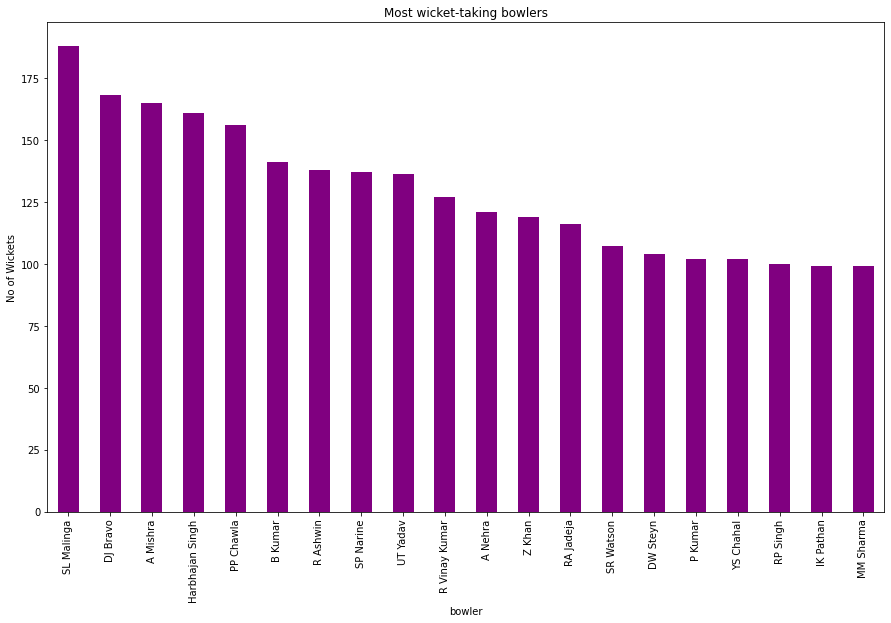

In [31]:
plt.figure(figsize=[15,9])
plt.title('Most wicket-taking bowlers')
plt.ylabel('No of Wickets')
deliveries.groupby('bowler').player_dismissed.count().sort_values(ascending=False)[:20].plot(kind='bar',color='purple')

In [32]:
#above chart clearly saya that the most wicket taking bowler is "SL Malinga"
#so he has big contribution in Mumbai Indians to winning match
#he followed by Dj Bravo,A Mishra
#there are 15 indian bowlers among top 20

# Make plot for "Most Run scoring Batsman"

<AxesSubplot:title={'center':'Most Run scoring Batsman'}, xlabel='batsman', ylabel='total run scored'>

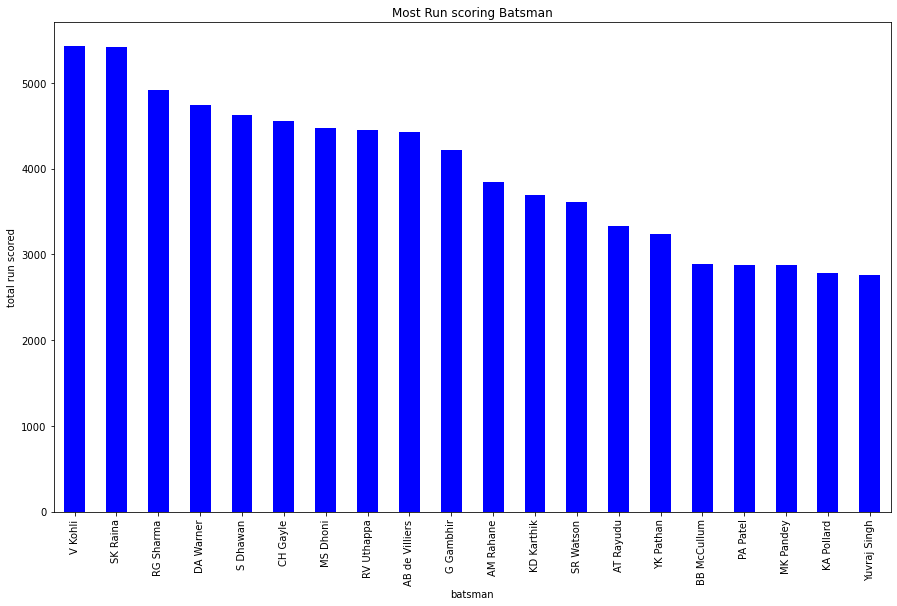

In [34]:
plt.figure(figsize=[15,9])
plt.title('Most Run scoring Batsman')
plt.ylabel('total run scored')
deliveries.groupby('batsman').batsman_runs.sum().sort_values(ascending=False)[:20].plot(kind='bar',color='blue')

In [35]:
#From the above graph we can say that most run scoring batsman  from all season combined is V Kohli 
#from RCB team
#He is followed by SK Raina and RG Sharma the top3 position occupied by "indian players"

# Sort values for top score

In [39]:
top_scores=deliveries.groupby(["match_id","batsman","batting_team","bowling_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs',ascending=False)[:10]

,match_id,batsman,batting_team,bowling_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,Pune Warriors,175
900,60,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,158
8426,562,AB de Villiers,Royal Challengers Bangalore,Mumbai Indians,133
10149,7935,RR Pant,Delhi Daredevils,Sunrisers Hyderabad,130
9257,620,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,129
5585,372,CH Gayle,Royal Challengers Bangalore,Delhi Daredevils,128
3135,206,M Vijay,Chennai Super Kings,Rajasthan Royals,127
529,36,DA Warner,Sunrisers Hyderabad,Kolkata Knight Riders,126
7752,516,V Sehwag,Kings XI Punjab,Chennai Super Kings,122
10417,7953,SR Watson,Chennai Super Kings,Sunrisers Hyderabad,121


In [40]:
#this infromation shows that the highest score by batsman in an inning
#the CH Gayle is the highest scorer batsman  i.e. score 175 

# Make plot on "Team with total no of matches win"

<AxesSubplot:title={'center':'team with total no of matches win'}, ylabel='No of matches won'>

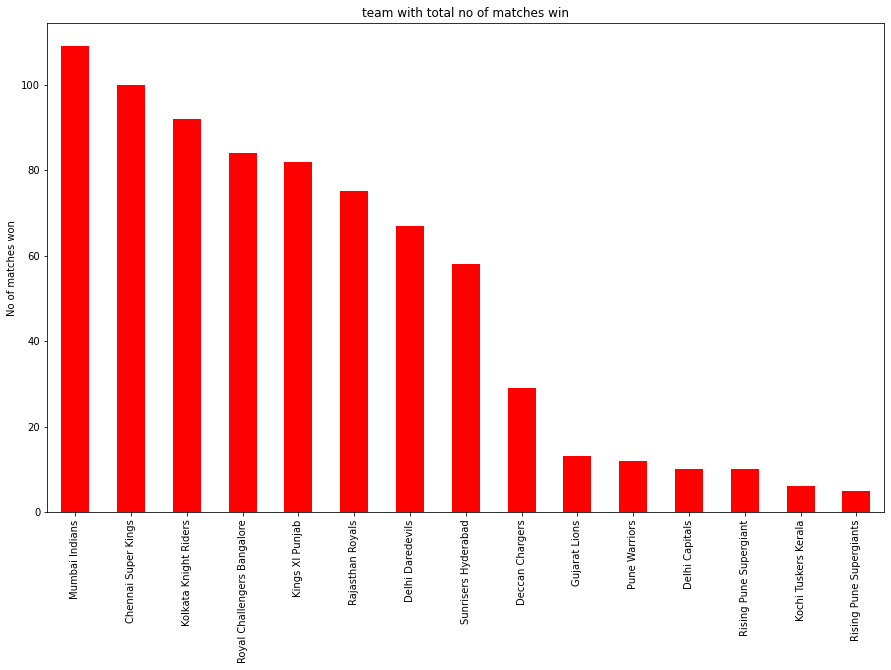

In [42]:
plt.figure(figsize=[15,9])
plt.title('team with total no of matches win')
plt.ylabel('No of matches won')
matches.winner.value_counts().plot(kind='bar',color='red')


In [43]:
#From the above graph we can easily sat that "MUMBAI INDIANS WON MAXIMUN MATCHES"

<BarContainer object of 2 artists>

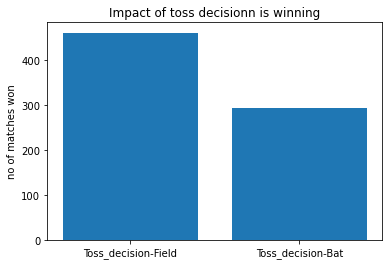

In [49]:
plt.title("Impact of toss decisionn is winning")
plt.ylabel("no of matches won")
result=['Toss_decision-Field','Toss_decision-Bat']
count=[matches[matches.toss_decision == 'field'].winner.count(),matches[matches.toss_decision == 'bat'].winner.count()]
plt.bar(result,count)

In [ ]:
#Above chart shows impact of toss decision over winning match
#this chart shows that choose to field first that higher chance of winning match 

# Make plot on "Match hosthing cities"

<AxesSubplot:title={'center':'Most hosting cities'}, ylabel='no of matches won'>

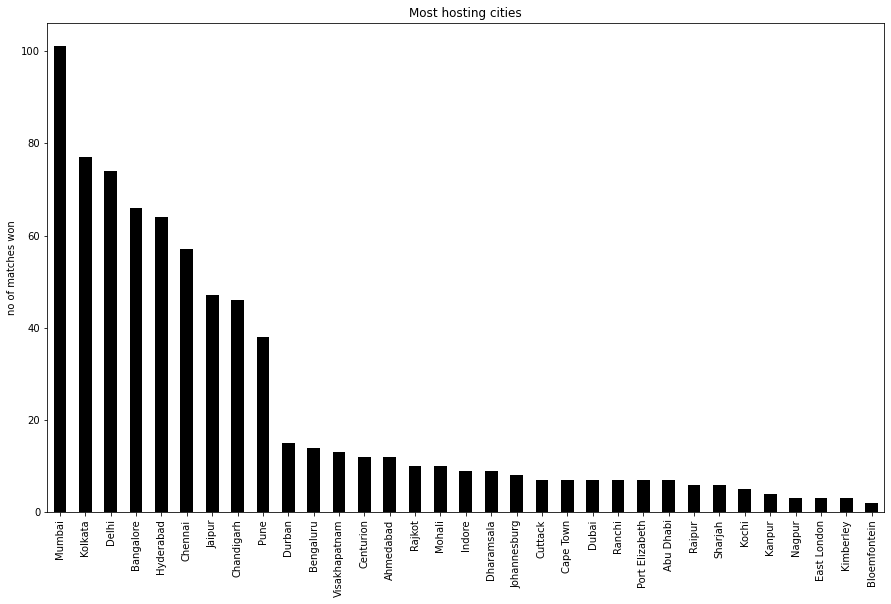

In [51]:
plt.figure(figsize=[15,9])
plt.title("Most hosting cities")
plt.ylabel("no of matches won")
matches.city.value_counts().plot(kind='bar',color='black')

In [52]:
#The above chart shows no of IPL matches played in the cities
#This clearly shows that the Mumbai hosted most of the matches

# Make plot on "Match Hosting Venues"

<AxesSubplot:title={'center':'Match hosting venues'}, ylabel='no of matches won'>

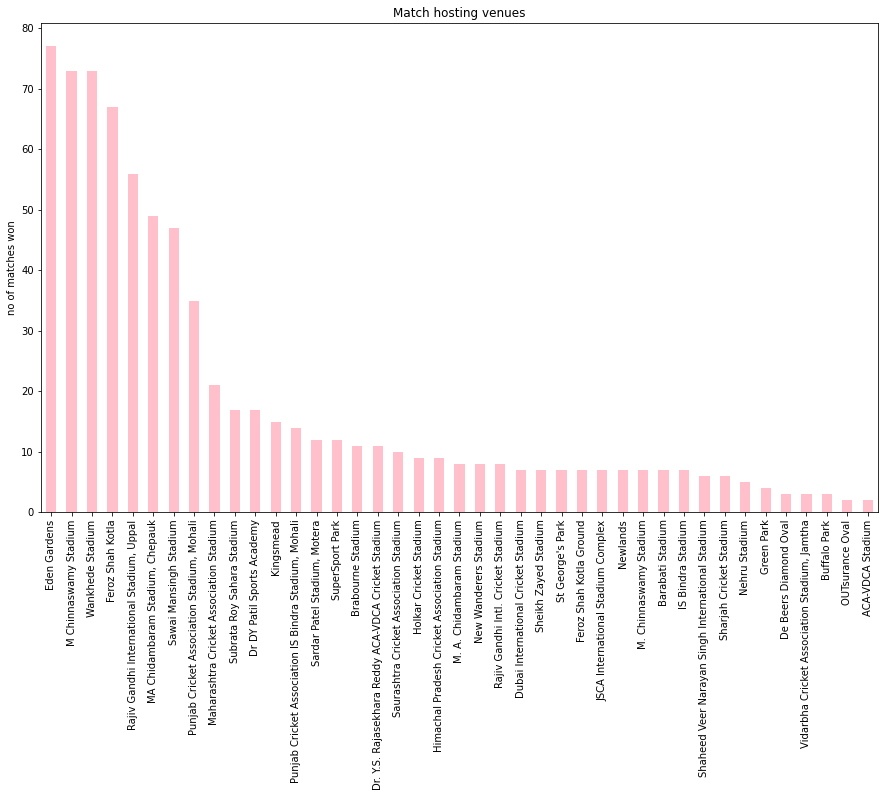

In [53]:
plt.figure(figsize=[15,9])
plt.title("Match hosting venues")
plt.ylabel("no of matches won")
matches.venue.value_counts().plot(kind='bar',color='pink')

In [54]:
#Above char shows the no of ipl matches played at venue
#The most matches played at Eden Garden in West Bengal

# Make plot on "Player of the match won"

<AxesSubplot:title={'center':'Player of the match won'}>

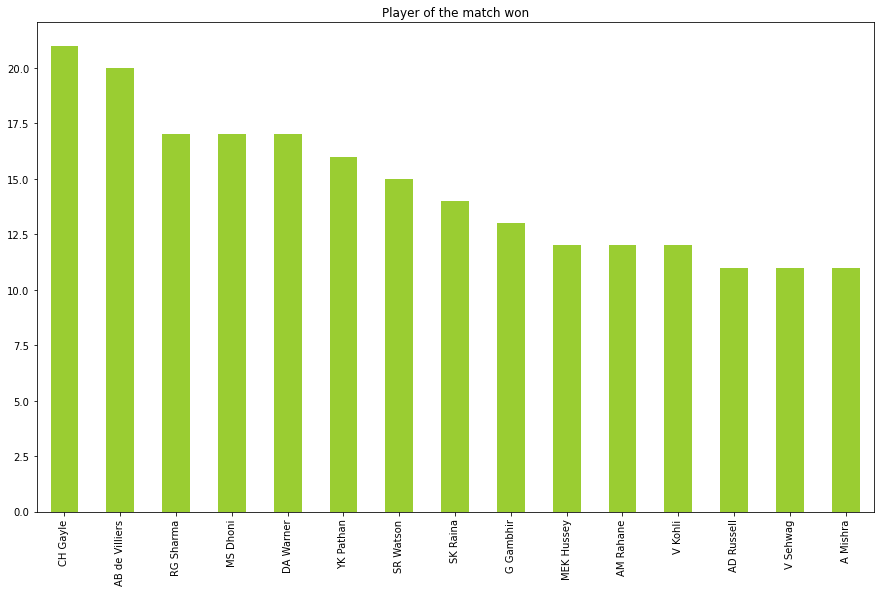

In [56]:
plt.figure(figsize=[15,9])
plt.title("Player of the match won")
matches.player_of_match.value_counts()[:15].plot(kind='bar',color='yellowgreen')

In [57]:
#The above chart show the player who won the maximum player of the match
#the Player CH Gayle won the maximum no of the player of the match

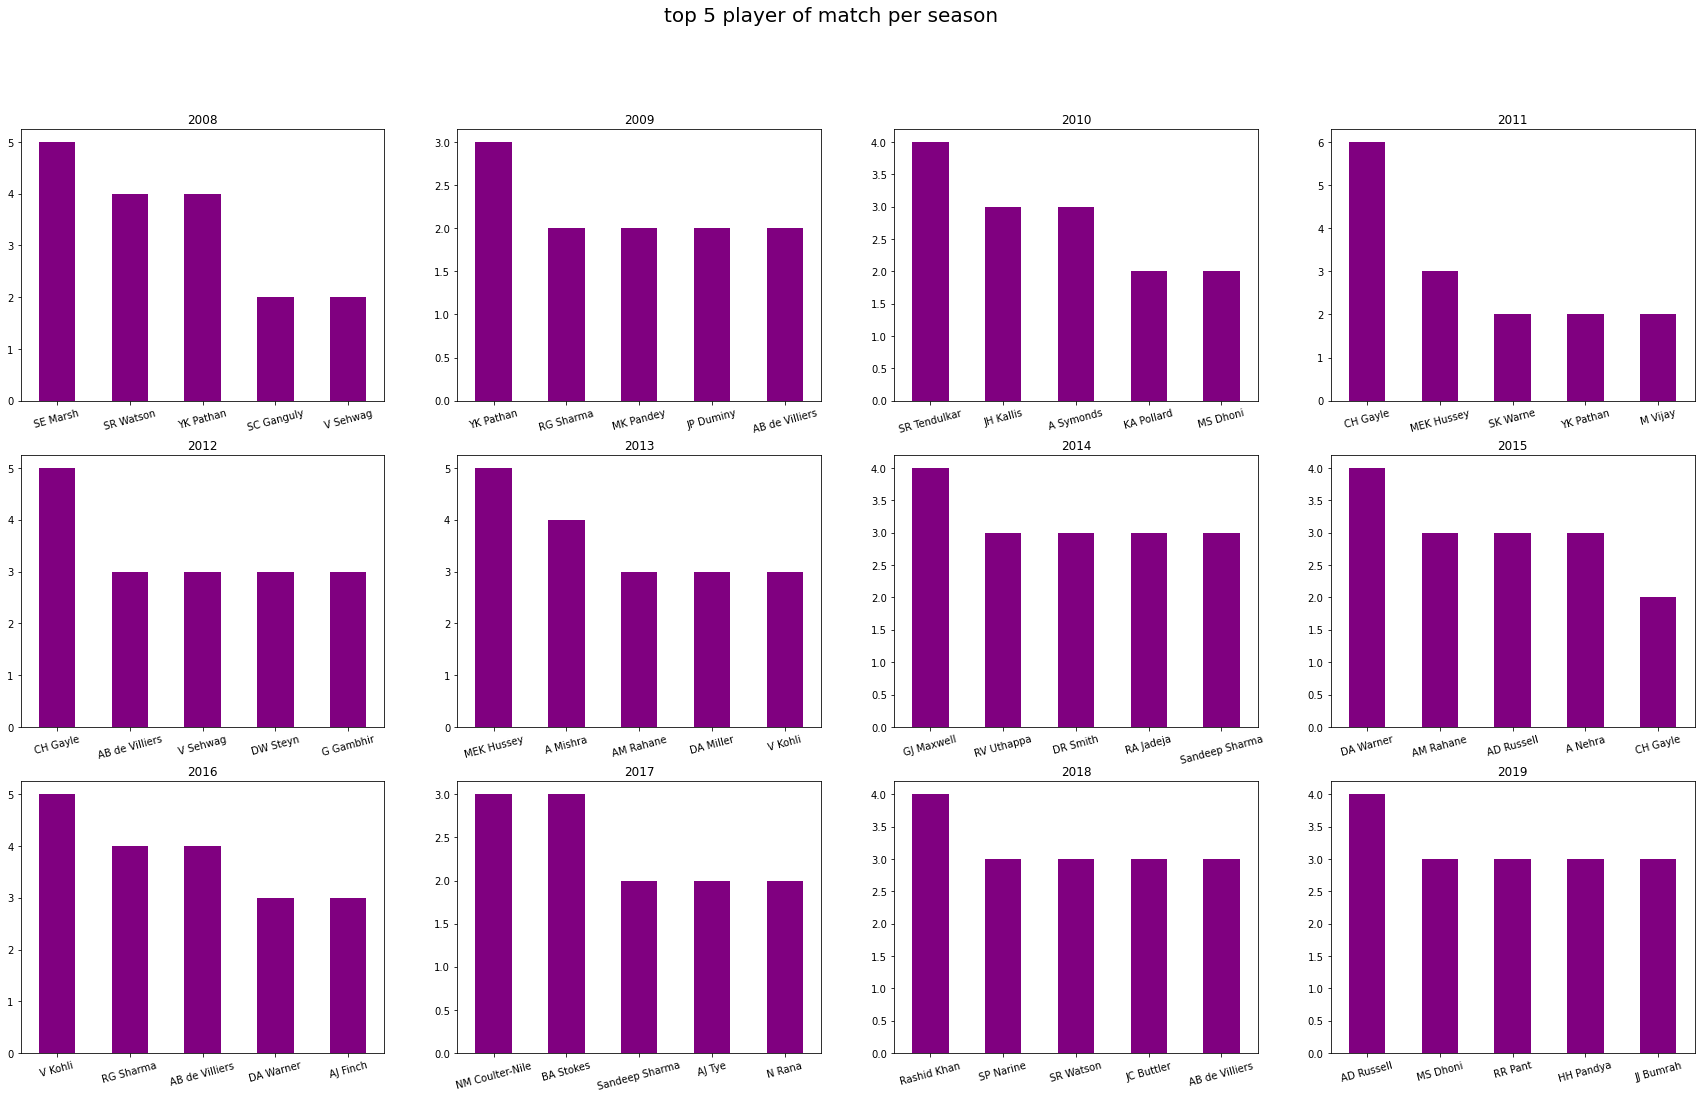

In [64]:
plt.figure(figsize=[30,17])
plt.suptitle('top 5 player of match per season',fontsize=20)
season1=2008
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.title(season1)
    matches[matches.season == season1].player_of_match.value_counts()[:5].plot(kind='bar',color='purple')
    plt.xticks(rotation=15)
    season1 += 1
plt.show()
    

In [65]:
# From the above chart we can say that top player from each season which helps during auction

<AxesSubplot:title={'center':'No of Four hits'}, xlabel='batsman,total_runs'>

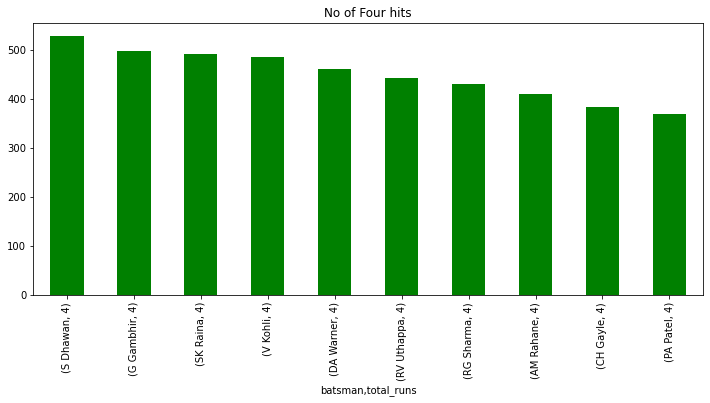

In [67]:
plt.figure(figsize=[12,5])
plt.title("No of Four hits")
fours=deliveries[deliveries.total_runs==4].groupby('batsman')
fours.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind='bar',color='green')

In [68]:
#Shikhar Dhawan hits the maximum no of fours 

<AxesSubplot:title={'center':'No of Six hits'}, xlabel='batsman,total_runs'>

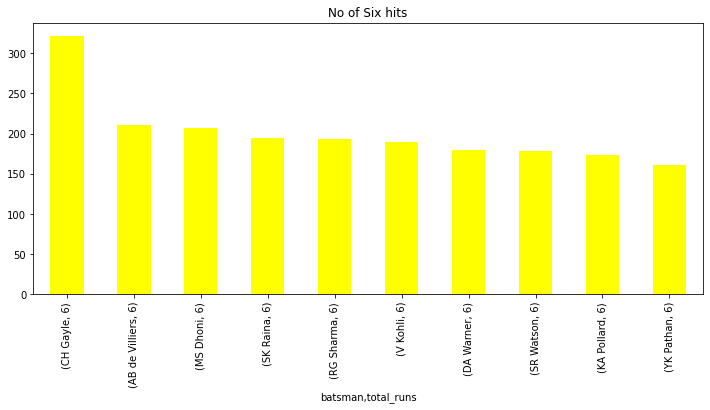

In [71]:
plt.figure(figsize=[12,5])
plt.title("No of Six hits")
sixes=deliveries[deliveries.total_runs==6].groupby('batsman')
sixes.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind='bar',color='yellow')

In [70]:
# CH Gayle hits the maximum no of the sixes